# Análise da diferença de imagens

### Neste exercício utilizaremos o conjunto de dados da FEI + duas fotos inéditas
- Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip
- Descompacte o conjunto e dados no mesmo diretório deste arquivo
- Copie as duas imagens inéditas para o mesmo diretório deste arquivo

##### Passo 1: Importar as bibliotecas necessárias

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

##### Passo 2: Importar o conjunto de dados da FEI

In [2]:
# Criando uma variável para armazenar as imagens
dataset = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*.jpg"):
    # Carredando a imagem do índice
    load_file = Image.open(file)
    # Convertendo a imagem e tons de cinza
    load_file = load_file.convert("L")
    # Convertendo o objeto imagem em array
    load_file = np.array(load_file)
    # Adicionando a array da na variável dataset
    dataset.append(load_file)
# Convertendo a lista de imagens em array
dataset = np.array(dataset)

In [3]:
# Dimensão do conjunto de dados
dataset.shape

(200, 360, 260)

##### Passo 3: Importar as duas fotos inéditas

In [4]:
# Nesta etapa iremos importar a imagem, converter em tons de cinza e em array
foto_neutra = np.array(Image.open('minha_foto_a.jpg').convert("L"))
foto_sorrindo = np.array(Image.open('minha_foto_b.jpg').convert("L"))

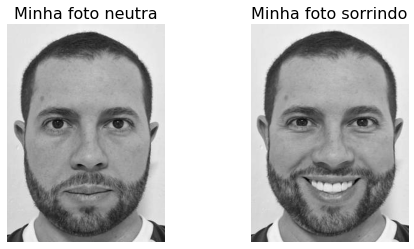

  Dimensões da foto neutra: (360, 260)
Dimensões da foto sorrindo: (360, 260)


In [5]:
# Visualizando as fotos inéditas

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(8, 4))

# Configurando a visualização da imagem neutra 
plt.subplot(1,2,1)
plt.imshow(foto_neutra, cmap='gray')
plt.title('Minha foto neutra', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem sorrindo 
plt.subplot(1,2,2)
plt.imshow(foto_sorrindo, cmap='gray')
plt.title('Minha foto sorrindo', fontsize=16)
plt.axis('off')

plt.show()

# Imprime as dimensões das imagens
print('  Dimensões da foto neutra:', foto_neutra.shape)
print('Dimensões da foto sorrindo:', foto_sorrindo.shape)

##### Passo 4: Calcular a diferença das fotos inéditas em relação ao conjunto de dados da FEI

In [6]:
# Obtendo a dimensão do conjunto de imagens
indice = dataset.shape[0]

# Criando variáveis para armazenar a diferença das imagens
dif_neutral = np.zeros([indice])
dif_smiling = np.zeros([indice])

# Criando um laço de repetição para calcular a diferença entre as imagens
for img in range(indice):
    dif_neutral[img] = np.sum(abs(dataset[img,:,:]-foto_neutra))
    dif_smiling[img] = np.sum(abs(dataset[img,:,:]-foto_sorrindo))

In [7]:
# Convertendo o vetor de diferenças da imagem neutra em DataFrame
df_dif_neutral = pd.DataFrame(dif_neutral, columns = ['Diferença'] )
df_dif_neutral

,Diferença
0,16651670.0
1,16132997.0
2,16233180.0
3,16411652.0
4,15462709.0
...,...
195,15269752.0
196,11795335.0
197,12088671.0
198,16123208.0


In [8]:
# Selecionando as imagens com menor diferença da imagem neutra
s_dif_neutral = df_dif_neutral.sort_values(by = 'Diferença').head(5)
s_dif_neutral

,Diferença
196,11795335.0
60,11817559.0
197,12088671.0
61,12121595.0
165,12310277.0


In [9]:
# Obtendo o índice das imagens com menor diferença da imagem neutra
id_neutral = list(s_dif_neutral.index)
id_neutral

[196, 60, 197, 61, 165]

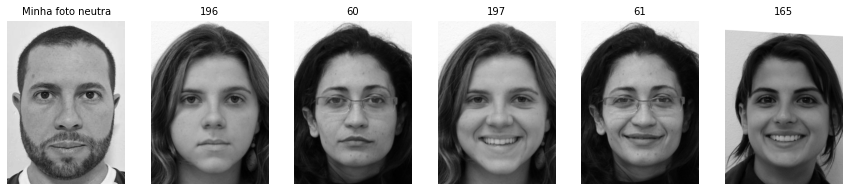

In [10]:
# Visualizando as imagens com menor diferença

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 3))

# Configurando a visualização da minha imagem neutra 
plt.subplot(1,len(id_neutral)+1,1)
plt.imshow(foto_neutra, cmap='gray')
plt.title('Minha foto neutra', fontsize=10)
plt.axis('off')

position = 2
for id_img in id_neutral:
    # Configurando a visualização da imagem média neutra 
    plt.subplot(1,len(id_neutral)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap='gray')
    plt.title(id_img, fontsize=10)
    plt.axis('off')

plt.show()

In [11]:
# Selecionando as imagens com maior diferença
df_dif_neutral_r = df_dif_neutral.sort_values(by = 'Diferença', ascending=False).head(5)

# Obtendo o índice das imagens com menor diferença
id_neutral_r = list(df_dif_neutral_r.index)
id_neutral_r

[88, 89, 28, 129, 32]

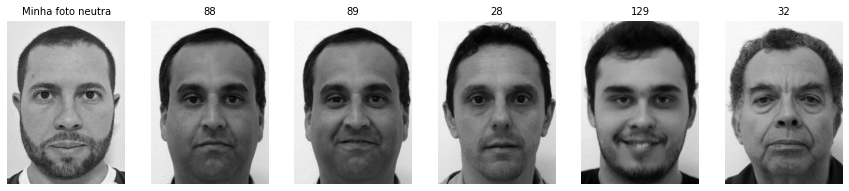

In [12]:
# Visualizando as imagens com maior diferença

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 3))

# Configurando a visualização da minha imagem neutra
plt.subplot(1,len(id_neutral_r)+1,1)
plt.imshow(foto_neutra, cmap='gray')
plt.title('Minha foto neutra', fontsize=10)
plt.axis('off')

position = 2
for id_img in id_neutral_r:
    # Configurando a visualização da imagem média neutra 
    plt.subplot(1,len(id_neutral_r)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap='gray')
    plt.title(id_img, fontsize=10)
    plt.axis('off')

plt.show()

#### Repetindo o processo para foto sorrindo...

In [13]:
# Convertendo o vetor de diferenças da imagem sorrindo em DataFrame
df_dif_smiling = pd.DataFrame(dif_smiling, columns = ['Diferença'] )
df_dif_smiling

,Diferença
0,16187671.0
1,16088326.0
2,15958109.0
3,16376197.0
4,15082166.0
...,...
195,14990585.0
196,11569672.0
197,11849440.0
198,15876553.0


In [14]:
# Selecionando as imagens com menor diferença da imagem sorrindo
s_dif_smiling = df_dif_smiling.sort_values(by = 'Diferença').head(5)
s_dif_smiling

,Diferença
60,11552216.0
196,11569672.0
61,11809916.0
197,11849440.0
165,11938950.0


In [15]:
# Obtendo o índice das imagens com menor diferença da imagem sorrindo
id_smiling = list(s_dif_smiling.index)
id_smiling

[60, 196, 61, 197, 165]

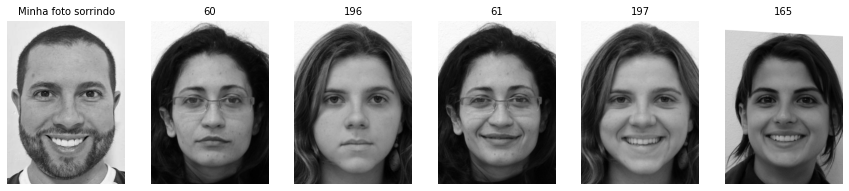

In [16]:
# Visualizando as imagens com menor diferença

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 3))

# Configurando a visualização da minha imagem sorrindo 
plt.subplot(1,len(id_smiling)+1,1)
plt.imshow(foto_sorrindo, cmap='gray')
plt.title('Minha foto sorrindo', fontsize=10)
plt.axis('off')

position = 2
for id_img in id_smiling:
    # Configurando a visualização da imagem média sorrindo 
    plt.subplot(1,len(id_smiling)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap='gray')
    plt.title(id_img, fontsize=10)
    plt.axis('off')

plt.show()

In [17]:
# Selecionando as imagens com maior diferença
df_dif_smiling_r = df_dif_smiling.sort_values(by = 'Diferença', ascending=False).head(5)

# Obtendo o índice das imagens com menor diferença
id_smiling_r = list(df_dif_smiling_r.index)
id_smiling_r

[88, 89, 28, 129, 29]

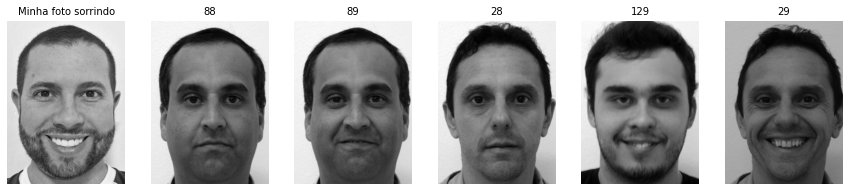

In [18]:
# Visualizando as imagens com maior diferença

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 3))

# Configurando a visualização da minha imagem sorrindo
plt.subplot(1,len(id_smiling_r)+1,1)
plt.imshow(foto_sorrindo, cmap='gray')
plt.title('Minha foto sorrindo', fontsize=10)
plt.axis('off')

position = 2
for id_img in id_smiling_r:
    # Configurando a visualização da imagem média sorrindo 
    plt.subplot(1,len(id_smiling_r)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap='gray')
    plt.title(id_img, fontsize=10)
    plt.axis('off')

plt.show()